In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import homework2q1a as hw2

In [4]:
###################################################################
# Run the stochastic gradient descent algorithm with relu
###################################################################
trainfile = 'train_data.txt'
testfile  = 'test_data.txt'
params = hw2.initialize(trainfile, testfile, eta = 0.01, maxiter = 20)


Loaded training data of shape:  (1000, 3) <type 'numpy.ndarray'>
Loaded testing data of shape:  (1000, 3) <type 'numpy.ndarray'>


In [16]:
model = hw2.sgd(**params)
# Total loss function value in an epoch is the sum of 
# loss functions corresponding to every example

Stochastic Gradient Descent: Running epoch  0
Total training loss in this epoch:  111.275059238
Total testing loss in this epoch:  117.303084889
Stochastic Gradient Descent: Running epoch  1
Total training loss in this epoch:  13.9294069108
Total testing loss in this epoch:  13.5082816117
Stochastic Gradient Descent: Running epoch  2
Total training loss in this epoch:  8.39927030828
Total testing loss in this epoch:  7.96827636044
Stochastic Gradient Descent: Running epoch  3
Total training loss in this epoch:  6.33349944477
Total testing loss in this epoch:  5.93569814733
Stochastic Gradient Descent: Running epoch  4
Total training loss in this epoch:  5.33706517608
Total testing loss in this epoch:  4.98386172844
Stochastic Gradient Descent: Running epoch  5
Total training loss in this epoch:  4.62086918981
Total testing loss in this epoch:  4.39563855883
Stochastic Gradient Descent: Running epoch  6
Total training loss in this epoch:  4.15962385891
Total testing loss in this epoch: 

In [17]:
######################################################################
# Validate using Keras model
######################################################################

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

x_train     = params['train_data'][:,:-1]
y_train     = np.array([hw2.label_to_ytrue(2, x) for x in params['train_data'][:, -1]])
x_test      = params['test_data'][:,:-1]
y_test      = np.array([hw2.label_to_ytrue(2, x) for x in params['test_data'][:, -1]])

keras_model = Sequential()
keras_model.add(Dense(3, activation='relu', 
                      use_bias = False, 
                      kernel_initializer='random_uniform', 
                      input_dim = 2))
keras_model.add(Dense(3, activation='relu',
                      use_bias = False, 
                      kernel_initializer='random_uniform'))
keras_model.add(Dense(2, activation='softmax', 
                      use_bias = False,
                      kernel_initializer='random_uniform'))
sgd = SGD(lr=params['eta'])
keras_model.compile(optimizer=sgd,
                    loss='mean_squared_error', metrics=['accuracy'])
keras_model.fit(x_train, y_train, 
                batch_size = 1,
                epochs=params['maxiter'])
score = keras_model.evaluate(x_test, y_test, batch_size=1)
kw = keras_model.get_weights()



Epoch 1/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 2/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 3/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 4/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 5/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 6/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 7/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 8/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 9/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 10/20
1000/1000 [==============================] - 2s - loss: 0.2500 - acc: 0.5000     
Epoch 11/20
1000/1000 [==============================] - 2s - loss: 0

In [18]:
# Note: In the following plots, we show how 
# training and testing loss changes with EPOCH.
# SGD algorithm is terminated once testing loss begins 
# to increase again

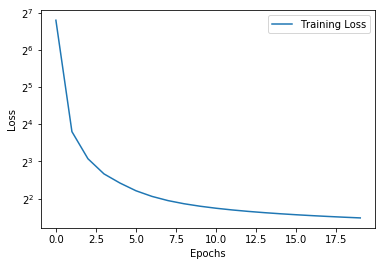

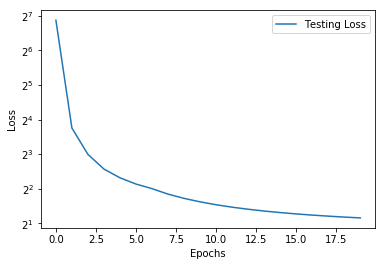

In [19]:
hw2.doplots("Loss vs Epochs (training)", model['total_training_loss_fn_value'], "Training Loss", "Epochs", "Loss", semilogy = True)
hw2.doplots("Loss vs Epochs (testing)", model['total_testing_loss_fn_value'], "Testing Loss", "Epochs", "Loss", semilogy = True)


In [20]:
######################################################################
# Display statistics
######################################################################

# Total loss function value in an epoch is the sum of 
# loss functions corresponding to every example
print "Testing accuracy for least test loss: ", model['testing_accuracy_with_best_test_loss']
print """
##############################################################
Weights corresponding to best testing accuracy (custom SGD): 
##############################################################"""
print "W1: ", model['w'][0]
print "W2: ", model['w'][1]
print "W3: ", model['w'][2]

Testing accuracy for least test loss:  0.999

##############################################################
Weights corresponding to best testing accuracy (custom SGD): 
##############################################################
W1:  [[ 1.45016221 -0.86164846]
 [-0.7230405   0.46580741]
 [-0.48755018  1.26329079]]
W2:  [[-0.01925452  0.62858035  1.11076685]
 [ 1.51093328  0.35250684  0.64975337]
 [-0.01797041  1.25092136  0.67887373]]
W3:  [[-0.16935912  1.40811677 -0.26703073]
 [ 1.50656148 -0.07638121  1.15343457]]


In [21]:
print """
##############################################################
Weights obtained from Keras: 
##############################################################"""
print "Keras W1:", kw[0]
print "Keras W2:", kw[1]
print "Keras W3:", kw[2]


##############################################################
Weights obtained from Keras: 
##############################################################
Keras W1: [[ 0.77414674 -0.04317837 -0.04298881]
 [-0.78001314  0.00758287 -0.02839755]]
Keras W2: [[ 1.09713435 -0.03700966 -0.04346051]
 [-0.03784521 -0.00263034 -0.03105944]
 [ 0.00419479 -0.02968076 -0.03769611]]
Keras W3: [[ 0.7682575  -0.78312558]
 [ 0.02998395  0.02922449]
 [ 0.01048733 -0.01484897]]


In [22]:
# Keras multiplies by weight vectors from the right so transposing it.
kwt = []
kwt.append(kw[0].T)
kwt.append(kw[1].T)
kwt.append(kw[2].T)


In [23]:

# Find the f_score and other metrics
precision_recall_fscore = hw2.get_precision_recall_fscore(params['shuffle_order_testing'], params['test_data'], model['w'], params['z'], params['a'], params['y'])
print """
#########################################################################
Precision, Recall and F-score for model output by running custom SGD
#########################################################################
"""
print "Precision: ", precision_recall_fscore[0]
print "Recall: ", precision_recall_fscore[1]
print "F-Score: ", precision_recall_fscore[2]



#########################################################################
Precision, Recall and F-score for model output by running custom SGD
#########################################################################

Precision:  [ 1.          0.99800399]
Recall:  [ 0.998  1.   ]
F-Score:  [ 0.998999  0.999001]


In [24]:

# Find the f_score and other metrics
precision_recall_fscore = hw2.get_precision_recall_fscore(params['shuffle_order_testing'], params['test_data'], kwt, params['z'], params['a'], params['y'])
print """
#########################################################################
Precision, Recall and F-score for model generated by running Keras SGD
#########################################################################
"""
print "Precision: ", precision_recall_fscore[0]
print "Recall: ", precision_recall_fscore[1]
print "F-Score: ", precision_recall_fscore[2]


#########################################################################
Precision, Recall and F-score for model generated by running Keras SGD
#########################################################################

Precision:  [ 0.5  0. ]
Recall:  [ 1.  0.]
F-Score:  [ 0.66666667  0.        ]
